In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [4]:
start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-01-03,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
2012-01-04,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2012-01-05,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
2012-01-06,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
2012-01-09,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...
2022-12-14,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2022-12-15,90.976578,91.199997,94.029999,90.430000,93.540001,28298800


In [8]:
data.reset_index(inplace = True)

In [9]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15,90.976578,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16,90.637405,90.860001,91.750000,90.010002,91.199997,48485500


In [10]:
ma_100_days = data.Close.rolling(100).mean()

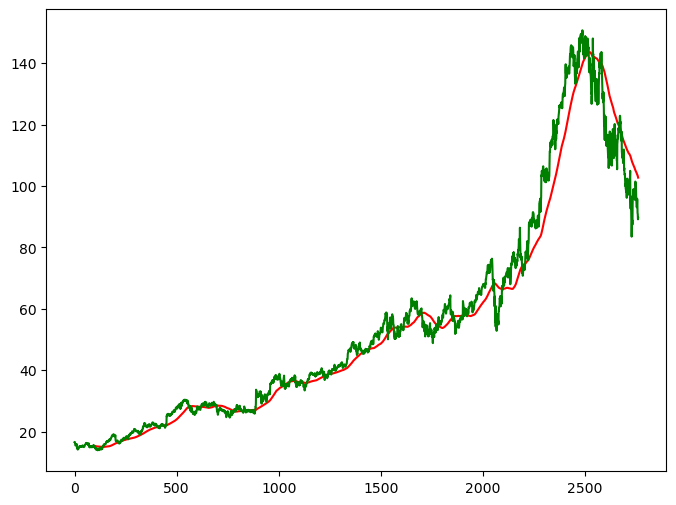

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
ma_200_days = data.Close.rolling(200).mean()

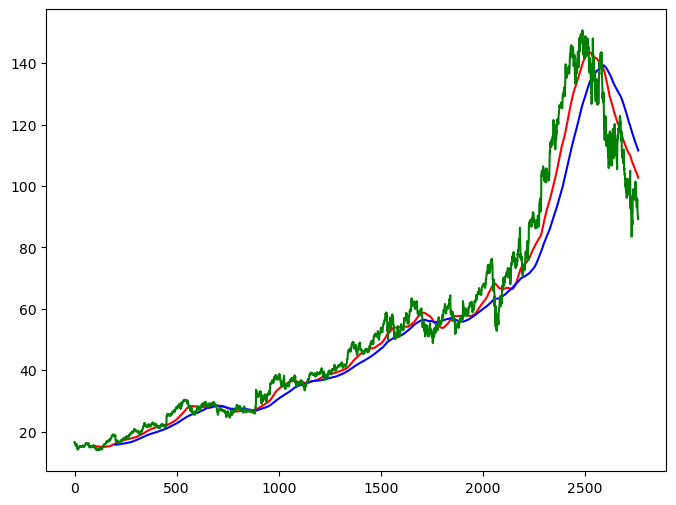

In [14]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [15]:
data.dropna(inplace=True)

In [26]:
data_train = data.Close[0:int(len(data)*0.80)]
data_test = data.Close[int(len(data)*0.80): len(data)]

In [27]:
data_train.shape[0]

2208

In [28]:
data_test.shape[0]

553

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_train_scale = scaler.fit_transform(data_train)

In [31]:
data_train_scale

array([[0.03654398],
       [0.03753007],
       [0.03434501],
       ...,
       [0.8151537 ],
       [0.83283888],
       [0.85304168]])

In [32]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [36]:
x,y = np.array(x), np.array(y)

In [37]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(x,y,epochs = 50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - loss: 0.0736
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - loss: 0.0066
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 0.0066
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.0064
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - loss: 0.0051
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 231ms/step - loss: 0.0046
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - loss: 0.0044
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - loss: 0.0049
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - loss: 0.0038
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - loss: 0.0045
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - loss: 0.0039
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 240ms/step - loss: 0.0037
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [40]:
  model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [41]:
pas_100_days = data_train.tail(100)


In [43]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [45]:
data_test_scale = scaler.fit_transform(data_test)

In [46]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    

In [47]:
y_predict = model.predict(x)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', 

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step 


In [48]:
y_predict

array([[0.32707533],
       [0.3270459 ],
       [0.3271031 ],
       [0.32715258],
       [0.32715872],
       [0.3271504 ],
       [0.32724163],
       [0.3272633 ],
       [0.3273202 ],
       [0.32729706],
       [0.3271163 ],
       [0.32731336],
       [0.3273831 ],
       [0.32746416],
       [0.32753003],
       [0.32705373],
       [0.32712382],
       [0.32717377],
       [0.327349  ],
       [0.3274223 ],
       [0.32729405],
       [0.32726255],
       [0.32742846],
       [0.32752088],
       [0.32726443],
       [0.32733756],
       [0.3266921 ],
       [0.32698703],
       [0.32712704],
       [0.32731047],
       [0.32752272],
       [0.3277194 ],
       [0.32765275],
       [0.3277213 ],
       [0.32781523],
       [0.32802543],
       [0.3278174 ],
       [0.327875  ],
       [0.32783175],
       [0.32785892],
       [0.32784367],
       [0.3281692 ],
       [0.3281338 ],
       [0.32818264],
       [0.32784447],
       [0.32782072],
       [0.3279398 ],
       [0.327

In [57]:
scale = 1/scaler.scale_

In [58]:
y_predict = y_predict*scale

In [59]:
y = y*scale

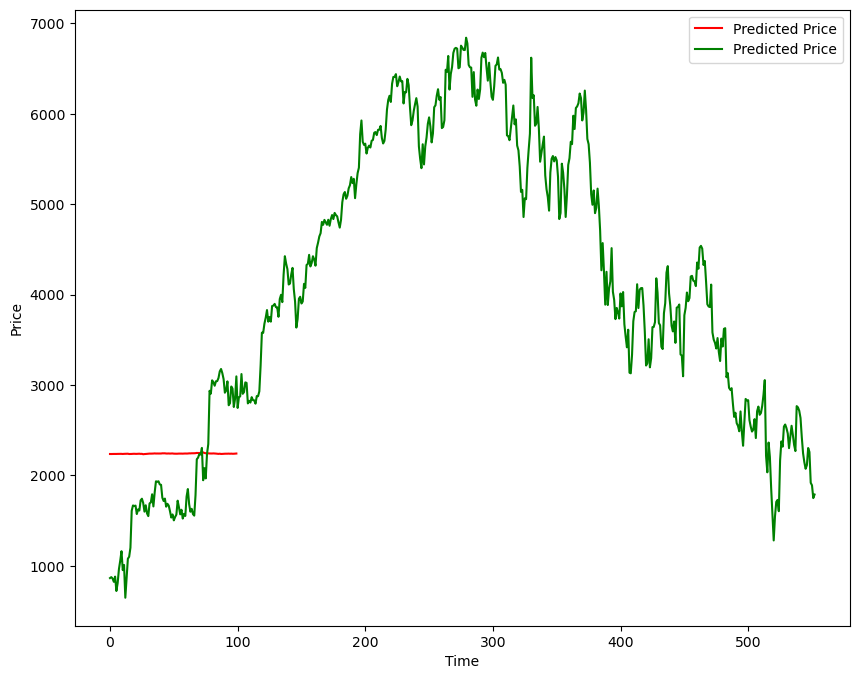

In [60]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [61]:
model.save('Stock Predictions Model.keras')